This is a modified version of the original code, it can either (1) read a new dataset or (2) generate its own data based on formulas

In [1]:
!pip list

Package                      Version             
---------------------------- --------------------
absl-py                      1.2.0               
argon2-cffi                  21.3.0              
argon2-cffi-bindings         21.2.0              
asttokens                    2.0.8               
astunparse                   1.6.3               
attrs                        22.1.0              
backcall                     0.2.0               
beautifulsoup4               4.11.1              
bleach                       5.0.1               
cachetools                   5.2.0               
certifi                      2019.11.28          
cffi                         1.15.1              
chardet                      3.0.4               
cycler                       0.11.0              
dbus-python                  1.2.16              
debugpy                      1.6.3               
decorator                    5.1.1               
defusedxml                   0.7.1               


In [2]:
# REQUIRED LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf


In [3]:
# READING THE DATASET

csvfileD = open("DatasetQ.csv", "r")
dataset = pd.read_csv(csvfileD)

In [4]:
dataset

,hi-lo,volume,changePercent
0,3.000992,39351922,2.59000
1,3.020607,28075243,2.96000
2,4.141934,37475143,4.09000
3,3.885993,43278690,1.17000
4,5.404689,53901476,-1.95000
...,...,...,...
1253,1.707389,44596240,1.36000
1254,2.369668,63924704,-0.76606
1255,2.498513,77054612,1.14000
1256,3.526137,44297504,3.02000


In [5]:
# extracting labels of columns
labels_list = dataset.columns.tolist()

label_x1 = labels_list[0]
label_x2 = labels_list[1]
label_y = labels_list[2]
print(label_x1,',', label_x2,',', label_y) 

hi-lo , volume , changePercent


In [6]:
x_1 = dataset[label_x1]
x_2 = dataset[label_x2]
y = dataset[label_y]

# .values returns a numpy ndarray object with all values from the pandas dataframe
x_1 = x_1.values
x_2 = x_2.values
y = y.values
# x1 and x2 are the independent variables and y is the dependent variable

In [7]:
len(x_1), len(x_2), len(y)

(1258, 1258, 1258)

In [3]:
####################### OMIT ONLY THIS CELL IF NO MATHEMATICAL DATASET IS GENERATED WITH A FORMULA
# the following input is equal to the total number of time steps
import math
total_steps = 1000

x_1 = []  # Initialize x_1 as a list
x_2 = []
y = []

for i in range(total_steps):

    f1 = i+0
    f2 = 100*math.sin(6*i)
    fy = f1+f2
    
    x_1.append(np.array(f1))  # Append NumPy array to the list
    x_2.append(np.array(f2))
    y.append(np.array(fy))

x_1 = np.array(x_1)  # Convert list of arrays to a NumPy array
x_2 = np.array(x_2)
y = np.array(y)

print(x_1, x_2, y)
label_x1 = 'x_1'
label_x2 = 'x_2'
label_y = 'y'

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

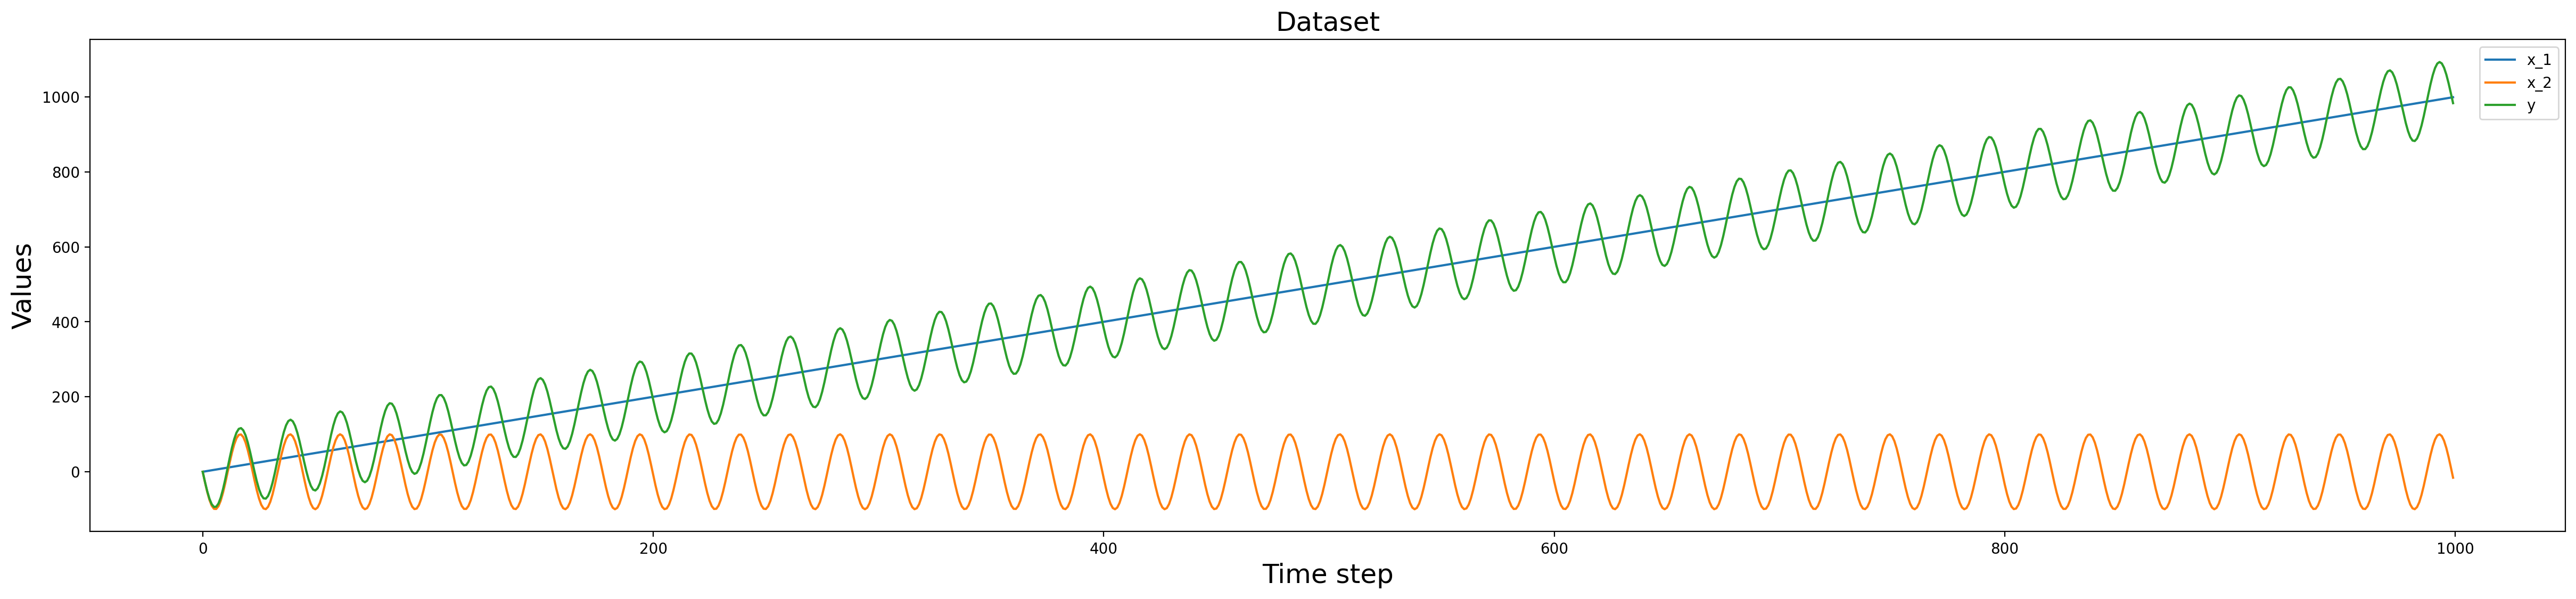

In [4]:
plt.figure(figsize=(30, 6))
plt.plot(x_1[:len(x_1)] , label=label_x1)
plt.plot(x_2[:len(x_2)] , label=label_x2)
plt.plot(y[:len(y)] , label=label_y)
plt.legend(loc='upper right')
plt.title("Dataset" ,  fontsize=18)
plt.xlabel('Time step' ,  fontsize=18)
plt.ylabel('Values' , fontsize=18)
plt.legend()
plt.show()

In [5]:
# PREPROCESSING THE DATA

# convert to [rows, columns] structure
x_1 = x_1.reshape((len(x_1), 1))
x_2 = x_2.reshape((len(x_2), 1))
y = y.reshape((len(y), 1))

print ("x_1.shape" , x_1.shape)
print ("x_2.shape" , x_2.shape)
print ("y.shape" , y.shape)

x_1.shape (1000, 1)
x_2.shape (1000, 1)
y.shape (1000, 1)


In [6]:
# normalization features
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
y_scaled = scaler.fit_transform(y)

# horizontally stack columns
dataset_stacked = hstack((x_1_scaled, x_2_scaled, y_scaled))

print ("dataset_stacked.shape" , dataset_stacked.shape)

dataset_stacked.shape (1000, 3)


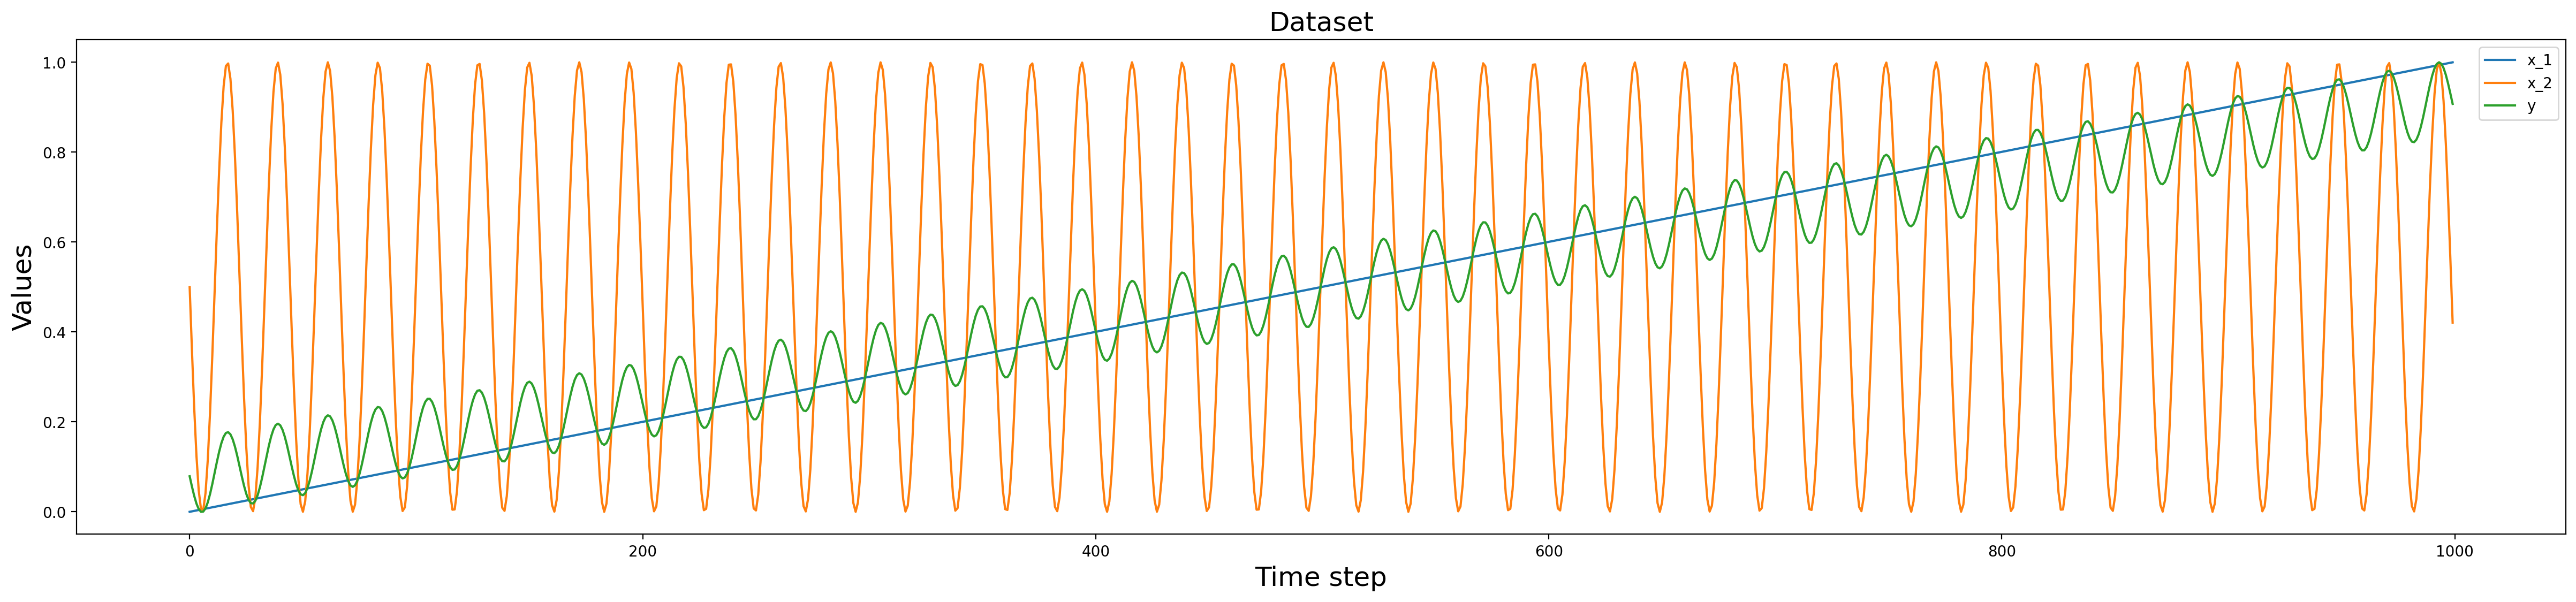

In [7]:
plt.figure(figsize=(30, 6))
plt.plot(x_1_scaled[:len(x_1)] , label=label_x1)
plt.plot(x_2_scaled[:len(x_2)] , label=label_x2)
plt.plot(y_scaled[:len(y)] , label=label_y)
plt.legend(loc='upper right')
plt.title("Dataset" ,  fontsize=18)
plt.xlabel('Time step' ,  fontsize=18)
plt.ylabel('Values' , fontsize=18)
plt.legend()
plt.show()

In [8]:
# SPLITTING THE DATA

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


In [9]:
# choose a number of time steps and change this accordingly
n_steps_in, n_steps_out = 20 , 10    
# The returned arrays are arranged in [n_dataset, n_steps_in , n_features] and [n_dataset, n_steps_out]
# ******* input ******* There are 2 key arguments we need to specify which are :
# 1. n_steps_in : Specify how much data we want to look back for prediction
# 2. n_step_out : Specify how much multi-step data we want to forecast
# example: STEPS_IN = 60  and STEPS_OUT = 30 
# lookback on 60 (x1,x2) past data, to forecast future 30 multi-step ahead of data
# Therefore\, the returned X and y are time-step shifted according to the argument, the the size should be (35139, 60, 2) and (35139, 30)
# 

# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)

print ("X.shape" , X.shape)
print ("y.shape" , y.shape)

X.shape (972, 20, 2)
y.shape (972, 10)


In [10]:
X

array([[[0.        , 0.50000039],
        [0.001001  , 0.36029136],
        [0.002002  , 0.23171147],
        ...,
        [0.01701702, 0.99741834],
        [0.01801802, 0.96341388],
        [0.01901902, 0.89249417]],

       [[0.001001  , 0.36029136],
        [0.002002  , 0.23171147],
        [0.003003  , 0.12450333],
        ...,
        [0.01801802, 0.96341388],
        [0.01901902, 0.89249417],
        [0.02002002, 0.79030864]],

       [[0.002002  , 0.23171147],
        [0.003003  , 0.12450333],
        [0.004004  , 0.04720706],
        ...,
        [0.01901902, 0.89249417],
        [0.02002002, 0.79030864],
        [0.02102102, 0.66499731]],

       ...,

       [[0.96996997, 0.94285494],
        [0.97097097, 0.99007694],
        [0.97197197, 0.99825972],
        ...,
        [0.98698699, 0.31405876],
        [0.98798799, 0.45115398],
        [0.98898899, 0.59214028]],

       [[0.97097097, 0.99007694],
        [0.97197197, 0.99825972],
        [0.97297297, 0.96675145],
        .

In [11]:
y

array([[0.16119664, 0.14481846, 0.124543  , ..., 0.02664801, 0.01934527,
        0.01861024],
       [0.14481846, 0.124543  , 0.10205252, ..., 0.01934527, 0.01861024,
        0.02456861],
       [0.124543  , 0.10205252, 0.07920573, ..., 0.01861024, 0.02456861,
        0.03681285],
       ...,
       [0.92709055, 0.95045596, 0.97079027, ..., 0.98715667, 0.97199065,
        0.95254797],
       [0.95045596, 0.97079027, 0.98654079, ..., 0.97199065, 0.95254797,
        0.93044453],
       [0.97079027, 0.98654079, 0.99651997, ..., 0.95254797, 0.93044453,
        0.90750821]])

In [12]:
split= len(x_1)*3/4         # we assume a 75%  25% split 
split = int(split)
print(split)

750


In [13]:
# we have a total of 28 batches of dependent and independent variables
# ******* input ******* now is the time to split them into 25 batches for training and the rest 3 batches for testing

train_X , train_y = X[:split, :] , y[:split, :]
test_X , test_y = X[split:, :] , y[split:, :]

n_features = train_X.shape[2]


In [14]:
print ("train_X.shape" , train_X.shape)   # [n_datasets,n_steps_in,n_features]
print ("train_y.shape" , train_y.shape)   # [n_datasets,n_steps_out]
print ("test_X.shape" , test_X.shape)
print ("test_y.shape" , test_y.shape)
print ("n_features" , n_features)

train_X.shape (750, 20, 2)
train_y.shape (750, 10)
test_X.shape (222, 20, 2)
test_y.shape (222, 10)
n_features 2


In [15]:
# LSTM MODEL SETTING
#
# The input_shape of the first LSTM node specify the shape of input data for prediction in the evaluation phase
# Meanwhile, the Dense Layer specify the output shape of the model based on n_steps_out
# ******* input ******* architecture may also vary

#optimizer learning rate
opt = keras.optimizers.Adam(learning_rate=0.01)

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(loss='mse' , optimizer=opt , metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 50)            10600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 31,310
Trainable params: 31,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#???????????? THIS CELL IS FROM ANOTHER CODE THAT STILL NEEDS TO BE IMPLEMENTED  ?????????????
#???????????? This cell needs to be modified to replace the compile above and the history below
model_nc.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=200),
             ModelCheckpoint(filepath='best_model_12.h5', monitor='val_loss', save_best_only=False)]
# fit the model
history2=model_nc.fit(train_X , train_y , epochs=500, batch_size=2, validation_data=(test_X, test_y), verbose=2,
               shuffle=True,callbacks=callbacks)

In [16]:
# TRAINING
#
# We have 25 batches of dataset, therefore the steps_per_epoch will be 25. In each steps, it will take 1258 data points (1 batch) for training
# With 25 steps per epoch, all 25 batches will be trained in each epoch
# With 60 epochs, each batch will be trained 60 times
# ******* input ******** training parameters may vary

# Fit network
history = model.fit(train_X , train_y , epochs=60 , steps_per_epoch=25 , verbose=1 ,validation_data=(test_X, test_y) ,shuffle=False)
####
#### with 1000 time_steps and a 3/4 train/test split at 750 time_steps you might want might be able to use 25 batches per epoch
#  750/25 = 30 time_steps per batch or 25 =(iteration) steps_per_epoch 
# so it seems that for each batch you train weights, which are then adjusted by using all the test data??? 


Epoch 1/60
25/25 [==============================] - 2s 28ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 2/60
25/25 [==============================] - 0s 17ms/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 3/60
25/25 [==============================] - 0s 17ms/step - loss: 0.0547 - mse: 0.0547 - val_loss: 0.0422 - val_mse: 0.0422
Epoch 4/60
25/25 [==============================] - 0s 17ms/step - loss: 0.0462 - mse: 0.0462 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 5/60
25/25 [==============================] - 0s 17ms/step - loss: 0.0426 - mse: 0.0426 - val_loss: 0.4080 - val_mse: 0.4080
Epoch 6/60
25/25 [==============================] - 0s 16ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 7/60
25/25 [==============================] - 0s 17ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0783 - val_mse: 0.0783
Epoch 8/60
25/25 [==============================] - 0s 17ms/step - loss: 0.0121 - m

In [39]:
# TEST DATA READING AND PROCESSING

# Test Data Batch 1 , Test Data Batch 2 , Test Data Batch 3
# reading the first batch of test data, and reshape and scale it  
csvfileb1 = open("Test Data Batch_Q.csv", "r")
dataset_test_ok = pd.read_csv(csvfileb1)

In [40]:

dataset_test_ok.head()
dataset_test_ok.shape

(1258, 3)

In [ ]:
# read test data
x1_test = dataset_test_ok['hi-lo'].values
x2_test = dataset_test_ok['volume'].values
y_test = dataset_test_ok['changePercent'].values # no need to scale

In [17]:
################### OMIT ONLY THIS CELL IF NO MATHEMATICAL DATASET IS GENERATED
# the following input is equal to the total number of time steps
total_steps = 500

x_1 = []  # Initialize x_1 as a list
x_2 = []
y = []

for i in range(total_steps):

    f1 = 2*i+0
    f2 = 100*math.sin(6*i)
    fy = f1+f2
    
    x_1.append(np.array(f1))  # Append NumPy array to the list
    x_2.append(np.array(f2))
    y.append(np.array(fy))

x_1 = np.array(x_1)  # Convert list of arrays to a NumPy array
x_2 = np.array(x_2)
y = np.array(y)

print(x_1, x_2, y)
label_x1 = 'x_1'
label_x2 = 'x_2'
label_y = 'y'

# Omit this cell if you are not using mathematical data
x1_test = x_1
x2_test = x_2
y_test = y

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322
 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358
 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394
 396 398 400 402 404 406 408 410 412 414 416 418 420 422 424 426 428 430
 432 434 436 438 440 442 444 446 448 450 452 454 456 458 460 462 464 466
 468 470 472 474 476 478 480 482 484 486 488 490 49

In [18]:

# convert to [rows, columns] structure
x1_test = x1_test.reshape((len(x1_test), 1))
x2_test = x2_test.reshape((len(x2_test), 1))
y_test = y_test.reshape((len(y_test), 1))

x1_test_scaled = scaler.fit_transform(x1_test)
x2_test_scaled = scaler.fit_transform(x2_test)


In [19]:
# PERFORMANCE EVALUATION
#
# prep_data: function to prepare test data and feed into our trained model to forecast the next n_step_out  (30) data, and
# prepare the past data for plotting purposes as well as groundtruth for validation
#
# start , end : To specify range of Test Data based on n_steps_in. can be any point in the test data batch
# last : last data of predicted value based on n_step_out
#
# ********* prep_data inputs: x1_test_scaled, x2_test_scaled, y_test and specify the start argument
# The end & last will be calculated automatically !
#
#
################ CONCLUDING/MAIN REMARKS ###########################:
# We can use the trained model with any dataset, where you will just need to know x1 and x2 for the last n_step_in 
# and it will predict y for the next n_step_out
###################################################################

def prep_data(x1_test_scaled , x2_test_scaled , y_test , start , end , last):
    #prepare test data X
    dataset_test = hstack((x1_test_scaled, x2_test_scaled))
    dataset_test_X = dataset_test[start:end, :]
    test_X_new = dataset_test_X.reshape(1, dataset_test_X.shape[0] , dataset_test_X.shape[1]) #(batch_size, time_steps, units)

    #prepare past and groundtruth (this is because your y_test argument in this function is not scaled whereas the x arguments are scaled)
    past_data = y_test[:end , :]   
    dataset_test_y = y_test[end:last , :]
    scaler1 = MinMaxScaler(feature_range=(0, 1))
    scaler1.fit(dataset_test_y)

    # predictions
    y_pred = model.predict(test_X_new)
    y_pred_inv = scaler1.inverse_transform(y_pred)
    y_pred_inv = y_pred_inv.reshape(n_steps_out,1)
    y_pred_inv = y_pred_inv[:,0]

    return y_pred_inv , dataset_test_y , past_data

# Calculate MAE and RMSE
# feed in the forecasted results and groundtruth 
def evaluate_prediction(predictions, actual, model_name , start , end):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print("Test Data from {} to {}".format(start, end))
    print('Mean Absolute Error: {:.2f}'.format(mae))
    print('Root Mean Square Error: {:.2f}'.format(rmse))
    print('')
    print('')

# Plot history and future
def plot_multistep(history, prediction1 , groundtruth , start , end):

    plt.figure(figsize=(20, 4))

    y_mean = mean(prediction1)

    range_history = len(history)
    range_future = list(range(range_history, range_history + len(prediction1)))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future, np.array(prediction1),label='Forecasted with LSTM')
    plt.plot(range_future, np.array(groundtruth),label='GroundTruth')

    plt.legend(loc='upper left')
    plt.title("Test Data from {} to {} , Mean = {:.2f}".format(start, end, y_mean) ,  fontsize=18)
    plt.xlabel('Time step' ,  fontsize=18)
    plt.ylabel('y-value' , fontsize=18)

1/1 [==============================] - 0s 165ms/step
Test Data from 120 to 140
Mean Absolute Error: 73.95
Root Mean Square Error: 88.37


1/1 [==============================] - 0s 17ms/step
Test Data from 140 to 160
Mean Absolute Error: 56.44
Root Mean Square Error: 67.83


1/1 [==============================] - 0s 16ms/step
Test Data from 160 to 180
Mean Absolute Error: 32.56
Root Mean Square Error: 40.04


1/1 [==============================] - 0s 16ms/step
Test Data from 180 to 200
Mean Absolute Error: 22.45
Root Mean Square Error: 26.43


1/1 [==============================] - 0s 19ms/step
Test Data from 200 to 220
Mean Absolute Error: 42.69
Root Mean Square Error: 47.67


1/1 [==============================] - 0s 19ms/step
Test Data from 220 to 240
Mean Absolute Error: 54.53
Root Mean Square Error: 61.26




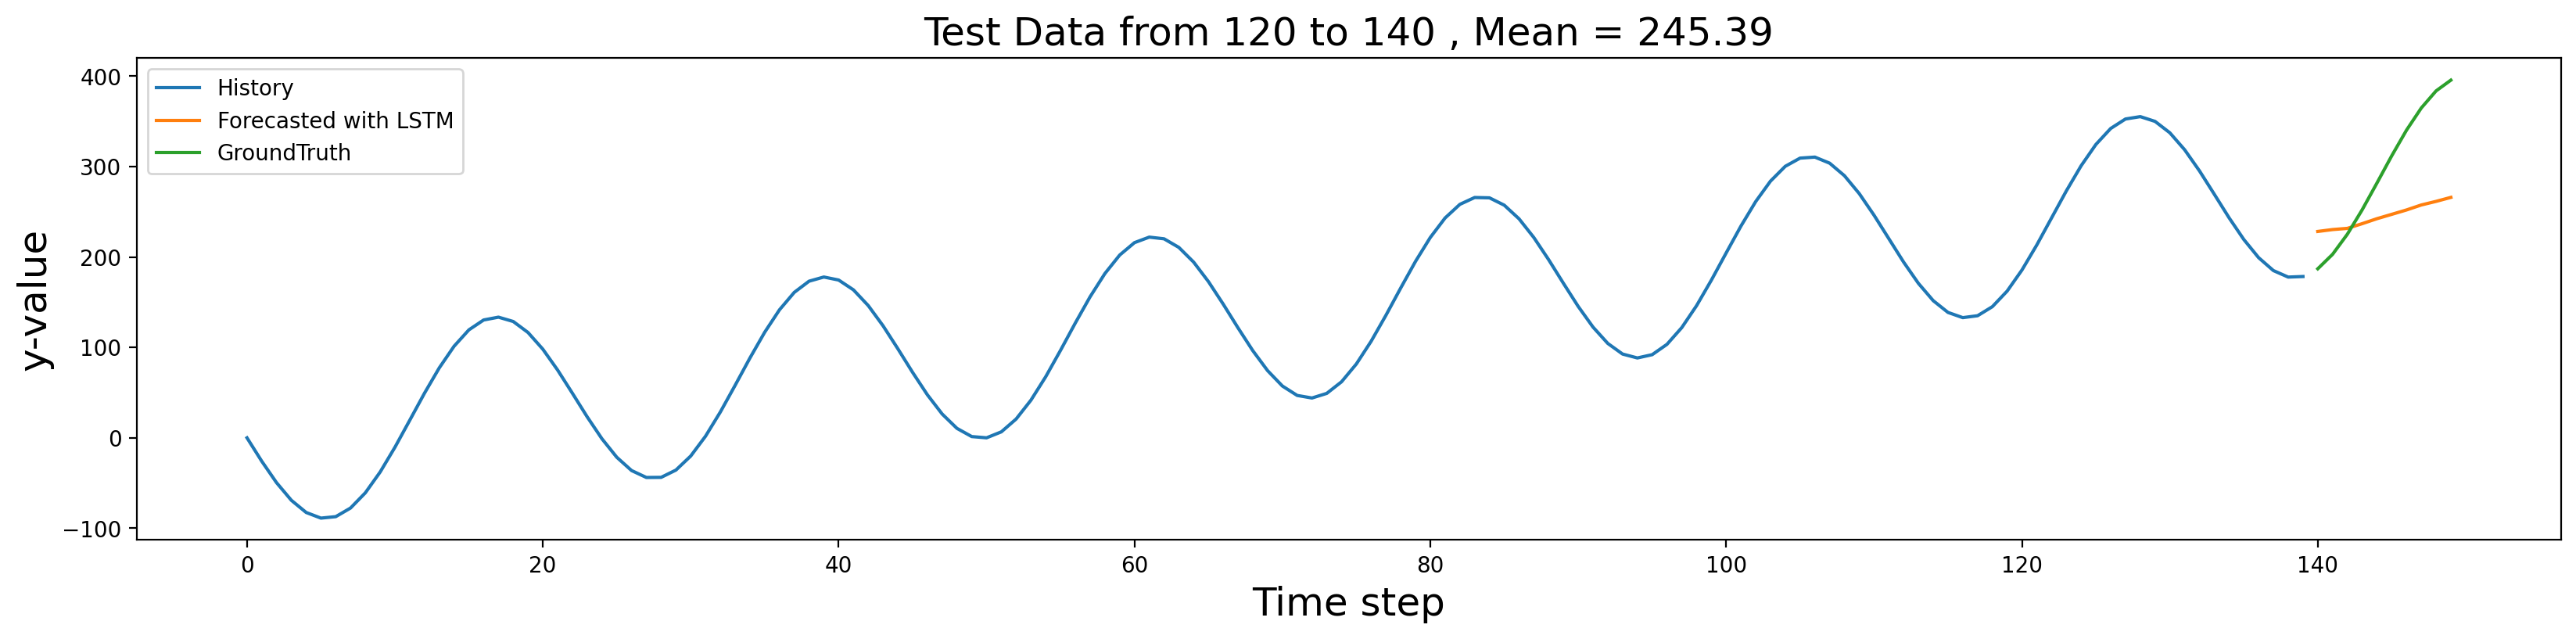

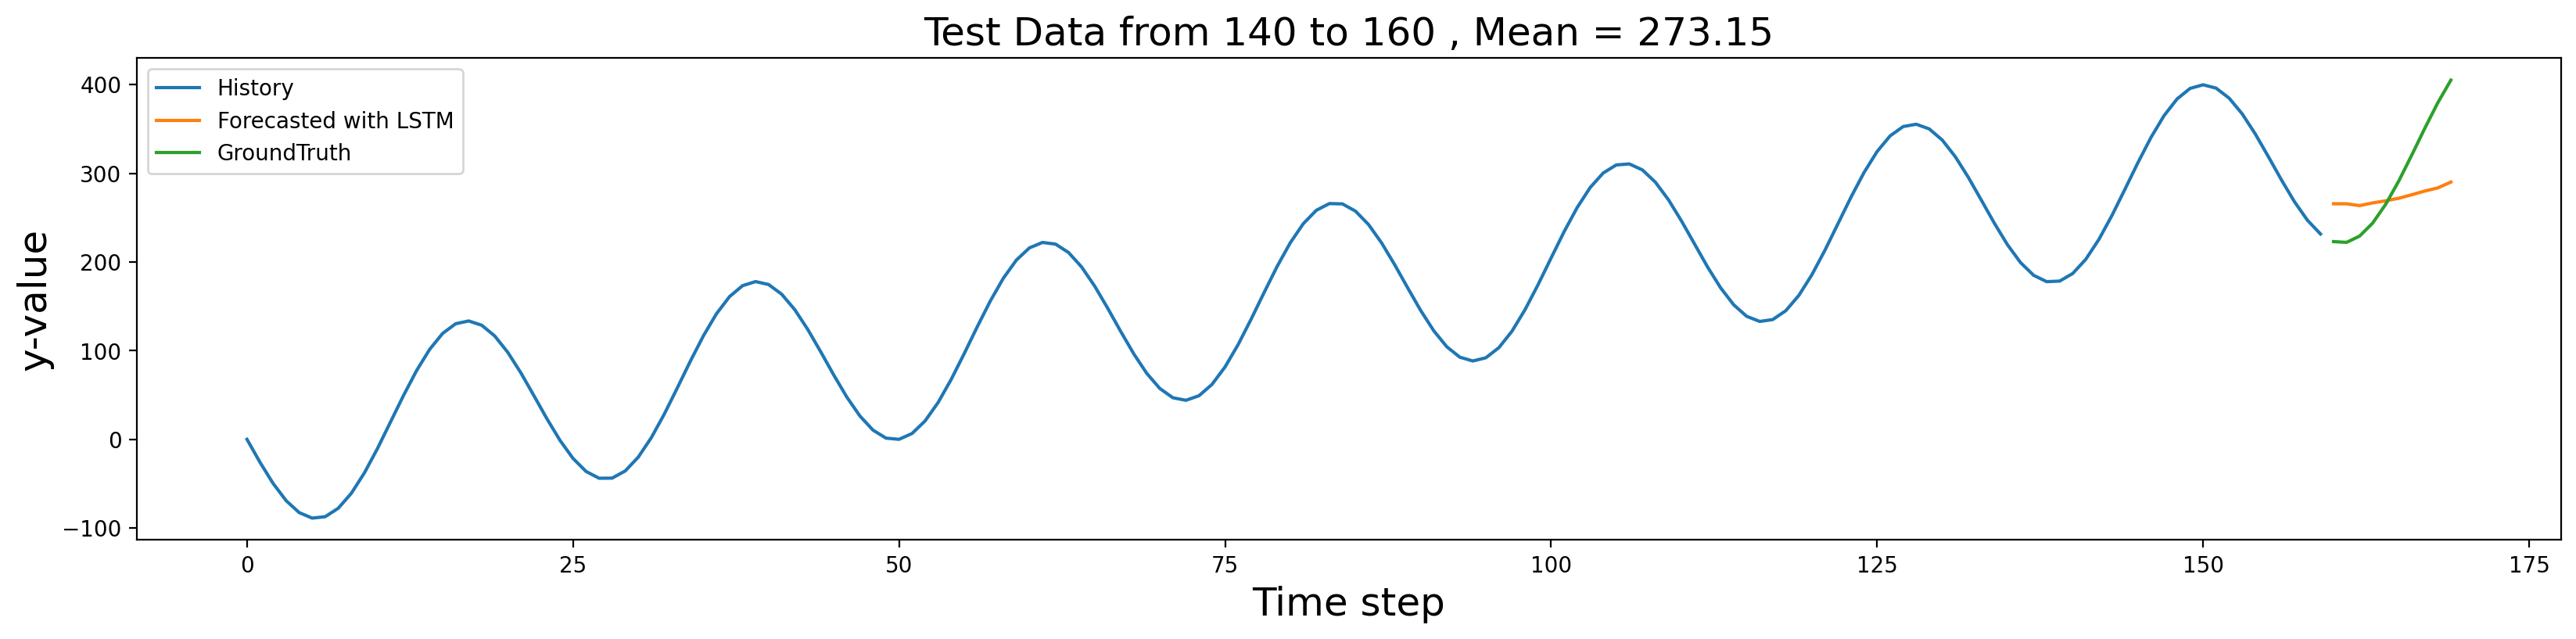

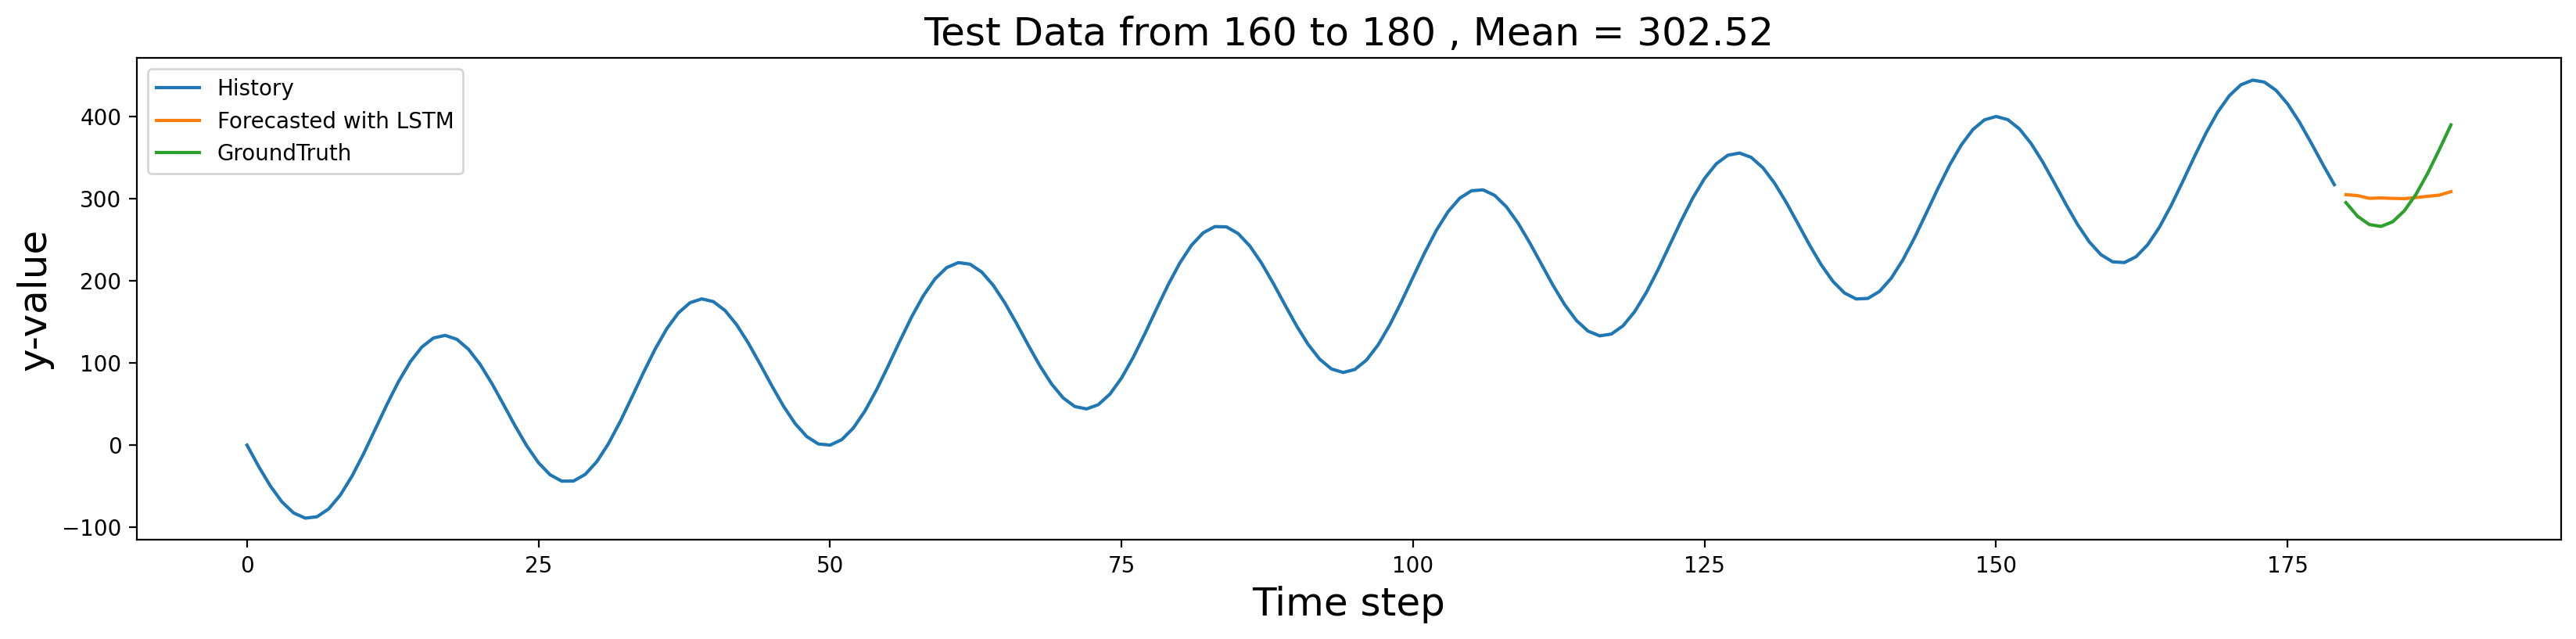

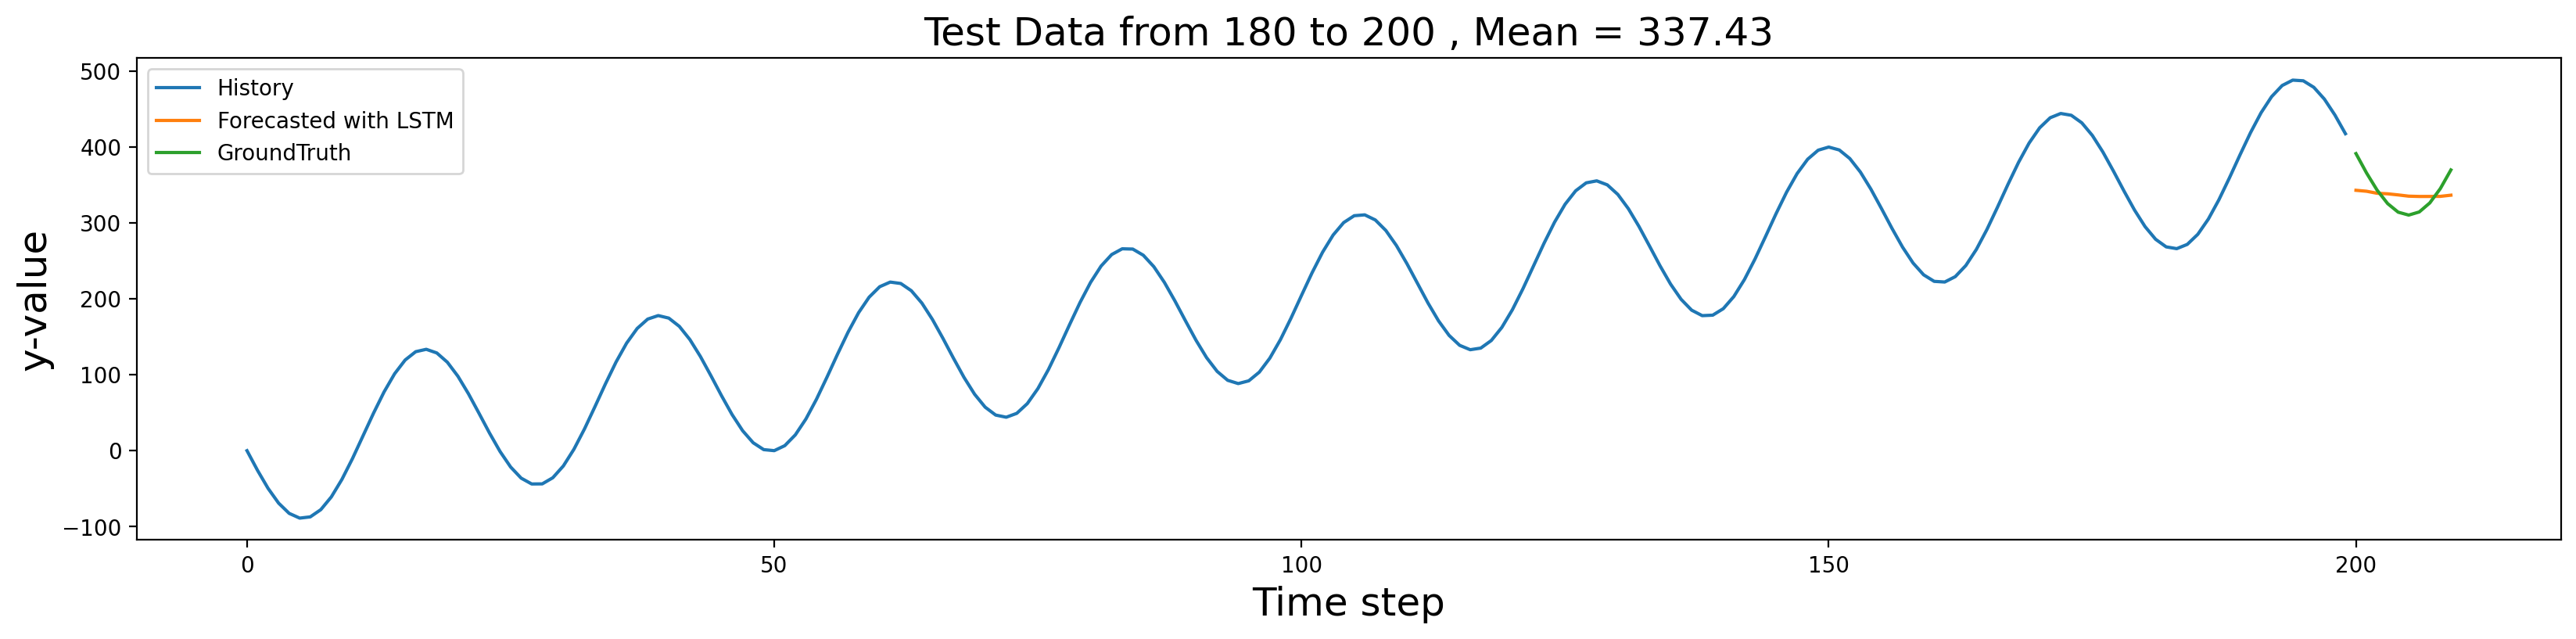

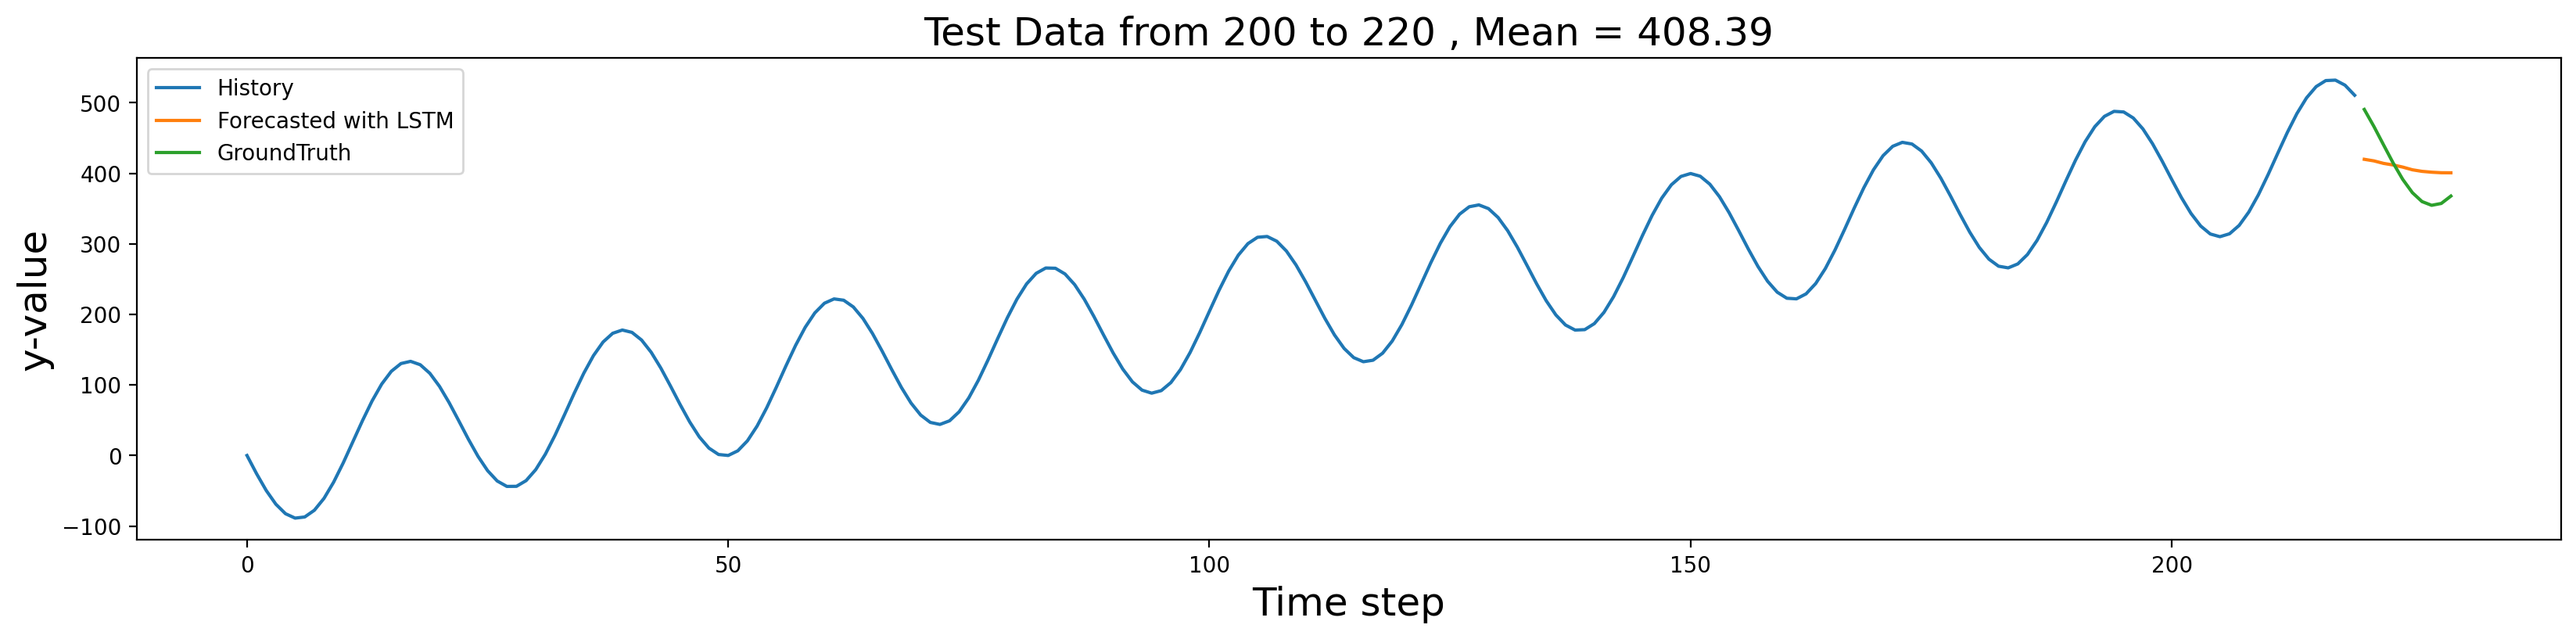

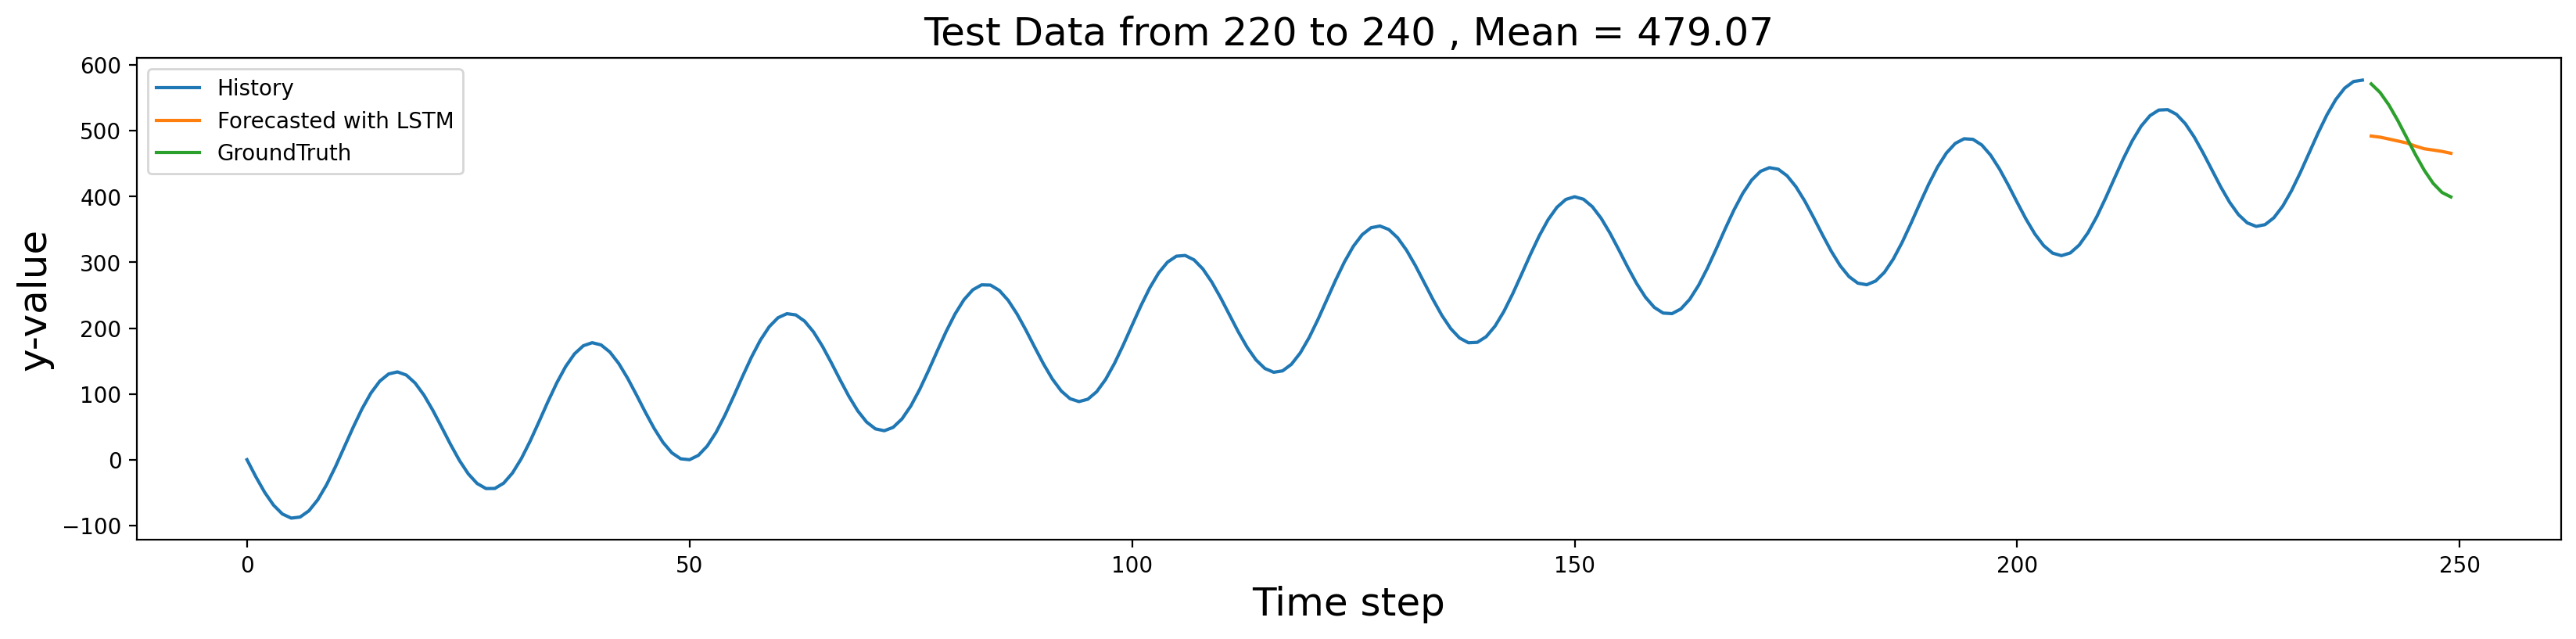

In [20]:
# For the first batch of test data (the only one being considered here)
# 120 to 180 and 180 to 240 will be the testing data to be fed into the trained model
# to forecast 30 steps ahead data based on previous 60 data with 2 features
# (for the case where n_steps_in = 60 and n_steps_out = 30)
# ******** This code is also capable of processing datasets with more than 2 features

for i in range(120,240,20):
    start = i
    end = start + n_steps_in
    last = end + n_steps_out
    y_pred_inv , dataset_test_y , past_data = prep_data(x1_test_scaled , x2_test_scaled , y_test , start , end , last)
    evaluate_prediction(y_pred_inv , dataset_test_y, 'LSTM' , start , end)
    plot_multistep(past_data , y_pred_inv , dataset_test_y , start , end)


Save & Load


In [ ]:
# model_url = '/Directory/Filename.h5'
# model.save(model_url)
# print("Saved")

In [ ]:
# model_url = '/Directory/Filename.h5'
# model = load_model(model_url)
# print("Loaded")
# model.summary()